## Transformers" in the context of artificial intelligence are a type of computer model designed to understand and generate human language. They're really good at tasks like translating languages, answering questions, and generating text. 

- Transformers rely on a mechanism called "self-attention" to weigh the importance of different words in a sentence when processing language data. This mechanism allows them to capture long-range dependencies and relationships between words more effectively than previous models. As a result, Transformers have achieved state-of-the-art performance in many NLP tasks, including language translation, text summarization, question answering, and sentiment analysis.

- In the context of Gen AI, Transformers represent a foundational technology that enables machines to understand and generate human-like text, facilitating more advanced and natural interactions between AI systems and humans. They are a key component in advancing AI capabilities towards more sophisticated language understanding and generation tasks.
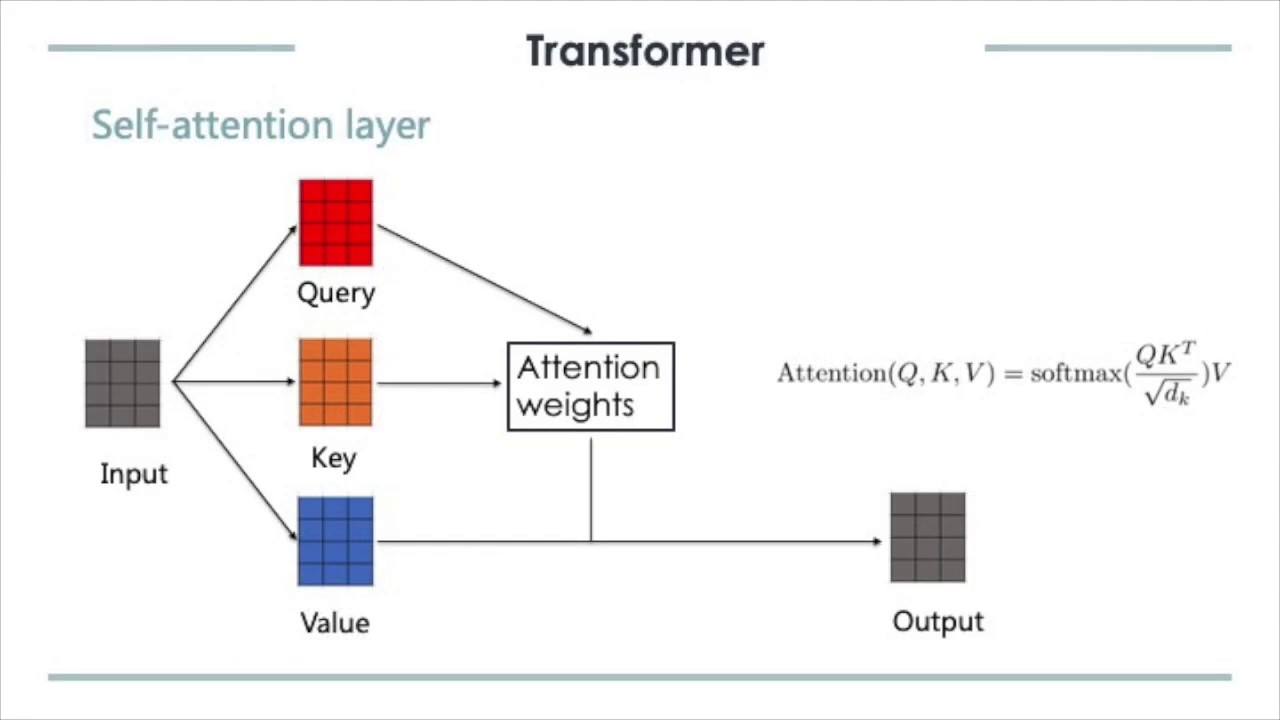

## The key components of Transformer models include:

- 1. **Self-Attention Mechanism**: This is the core component of Transformers. Self-attention allows the model to weigh the importance of different words in a sentence when processing language data. It enables capturing contextual relationships between words in a sequence, facilitating better understanding of the input.

- 2. **Multi-Head Attention**: In Transformers, self-attention is typically used in multiple "heads" or parallel attention mechanisms. Each head allows the model to focus on different parts of the input, enabling it to capture different types of relationships simultaneously.

- 3. **Positional Encoding**: Since Transformer models do not inherently understand the sequential order of input tokens like recurrent neural networks (RNNs), positional encoding is added to the input embeddings to provide information about the position of each token in the sequence.

- 4. **Feedforward Neural Networks**: Transformers include feedforward neural networks as part of their architecture. These networks are applied independently to each token's representation after self-attention and positional encoding, allowing the model to capture non-linear relationships between features.

- 5. **Encoder and Decoder Layers**: Transformer architectures often consist of encoder and decoder layers. The encoder processes the input sequence, while the decoder generates the output sequence in tasks like sequence-to-sequence translation. Each layer in the encoder and decoder typically includes self-attention and feedforward neural network sub-layers.

- 6. **Residual Connections and Layer Normalization**: To facilitate training deep networks, Transformers use residual connections around each sub-layer followed by layer normalization. These techniques help alleviate the vanishing gradient problem and improve the flow of information through the network.

- 7. **Masking**: In tasks like language translation, where the entire input sequence is available during training, masking is applied to prevent the model from attending to future tokens when predicting the output sequence.

These components work together to enable Transformers to achieve state-of-the-art performance in various natural language processing tasks.

## Word Embedding

- Word embedding is a technique used to represent words as vectors (arrays of numbers). These vectors capture semantic relationships between words.



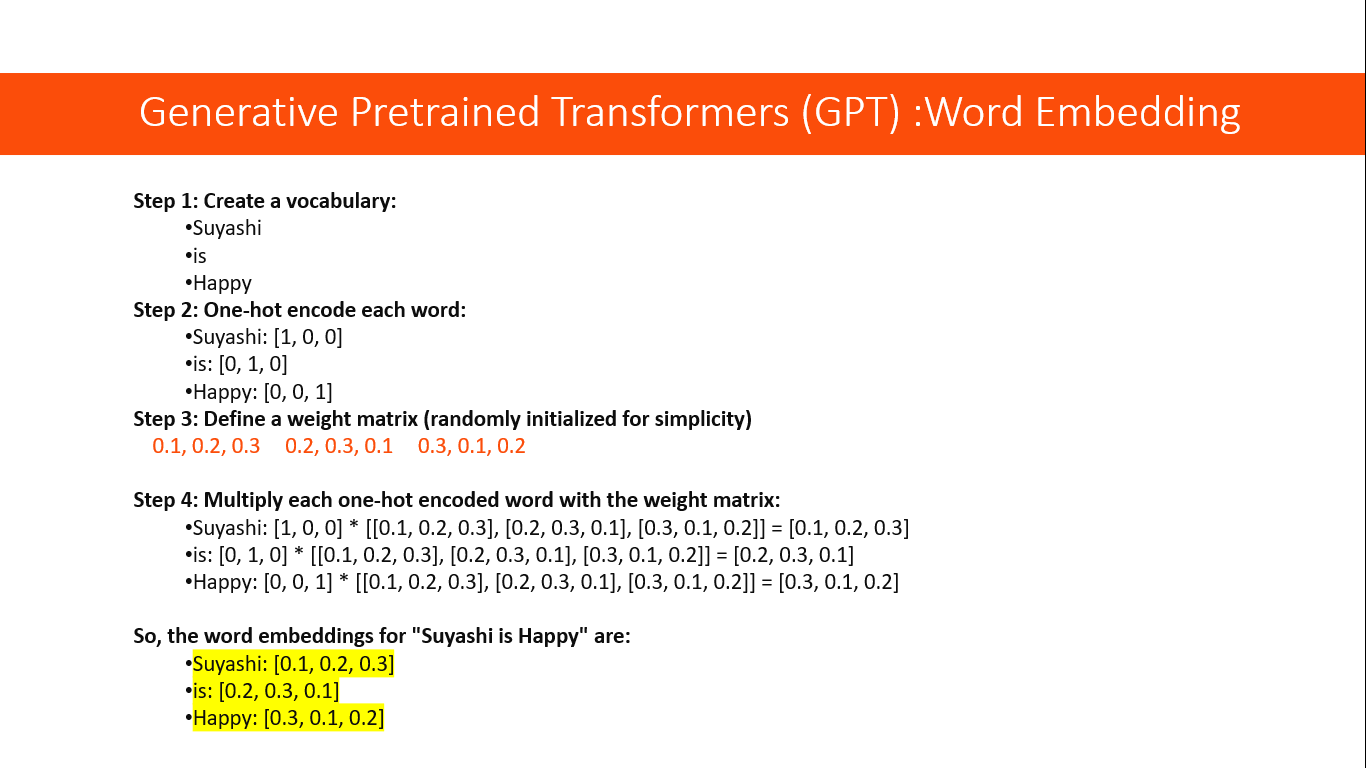

In [1]:
## Word Emdedding using Python 
import numpy as np

# Define the vocabulary
vocab = {"Suyashi": 0, "is": 1, "Happy": 2}

# One-hot encode each word
def one_hot_encoding(word_index, vocab_size):
    one_hot = np.zeros(vocab_size)
    one_hot[word_index] = 1
    return one_hot

# Define the weight matrix (random initialization for simplicity)
weight_matrix = np.random.rand(len(vocab), 3)

# Multiply one-hot encoded words with the weight matrix
word_embeddings = {}
for word, index in vocab.items():
    one_hot_encoded = one_hot_encoding(index, len(vocab))
    embedding = np.dot(one_hot_encoded, weight_matrix)
    word_embeddings[word] = embedding

# Display word embeddings
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")


Suyashi: [0.72786249 0.97913333 0.46222707]
is: [0.85100283 0.82979828 0.3527125 ]
Happy: [0.13242841 0.53808146 0.4434078 ]


## Step 2:

- Backpropagation: We'll use a simple example to demonstrate how backpropagation might update the weights of a neural network based on the error calculated during training.
- Position Encoding: We'll implement a basic position encoding scheme to add positional information to the word embeddings.

In [2]:
## Back Propagation
import numpy as np

# Forward pass
def forward_pass(inputs, weights):
    return np.dot(inputs, weights)

# Backward pass
def backward_pass(inputs, weights, error):
    # Update weights based on the error
    gradient = np.dot(inputs.T, error)
    weights -= gradient * learning_rate

# Define inputs and initial weights
inputs = np.array([[0.1, 0.2, 0.3]])
initial_weights = np.random.rand(3, 3)

# Perform forward pass
output = forward_pass(inputs, initial_weights)

# Assume the target output is known (e.g., for supervised learning)
target_output = np.array([[1.0, 0.9, 0.8]])

# Calculate error
error = output - target_output

# Backpropagation to update weights
learning_rate = 0.01 ##(0.001 to 0.01)range of learning rate
backward_pass(inputs, initial_weights, error)

# Display updated weights
print("Updated weights after backpropagation:")
print(initial_weights)


Updated weights after backpropagation:
[[0.28314151 0.71673643 0.23859242]
 [0.14635812 0.06389333 0.22184883]
 [0.92818642 0.54451487 0.90764831]]


## let's implement a basic position encoding scheme to add positional information to the word embeddings:

In [3]:
import numpy as np

# Position Encoding
def position_encoding(sentence_length, embedding_dim):
    position_encodings = np.zeros((sentence_length, embedding_dim))
    for pos in range(sentence_length):
        for i in range(embedding_dim):
            if i % 2 == 0:
                position_encodings[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            else:
                position_encodings[pos, i] = np.cos(pos / (10000 ** ((i - 1) / embedding_dim)))
    return position_encodings

# Assuming we have word embeddings for "Suyashi", "is", "Happy" as follows
word_embeddings = {
    "Suyashi": np.array([0.1, 0.2, 0.3]),
    "is": np.array([0.2, 0.3, 0.1]),
    "Happy": np.array([0.3, 0.1, 0.2])
}

# Get the position encodings
sentence_length = 3
embedding_dim = 3
pos_encodings = position_encoding(sentence_length, embedding_dim)

# Add position encodings to word embeddings
for i, word in enumerate(word_embeddings):
    word_embeddings[word] += pos_encodings[i % sentence_length]

# Display word embeddings with position encodings
print("Word embeddings with position encodings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")


Word embeddings with position encodings:
Suyashi: [0.1 1.2 0.3]
is: [1.04147098 0.84030231 0.10215443]
Happy: [ 1.20929743 -0.31614684  0.20430886]


- We define the position encoding function and word embeddings as we did previously.
- We concatenate word embeddings with position encodings to create input vectors.
- The self_attention function calculates attention scores using dot product and scales them by the square root of the dimensionality of the embeddings.
- Softmax is applied to obtain attention weights.
- The attention weights are then used to compute the attended inputs by applying them to the input vectors.
- Finally, we display the attended inputs and attention weights.

In [4]:
import numpy as np

# Position Encoding
def position_encoding(sentence_length, embedding_dim):
    position_encodings = np.zeros((sentence_length, embedding_dim))
    for pos in range(sentence_length):
        for i in range(embedding_dim):
            if i % 2 == 0:
                position_encodings[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            else:
                position_encodings[pos, i] = np.cos(pos / (10000 ** ((i - 1) / embedding_dim)))
    return position_encodings

# Word embeddings for "Suyashi", "is", "Happy"
word_embeddings = {
    "Suyashi": np.array([0.1, 0.2, 0.3]),
    "is": np.array([0.2, 0.3, 0.1]),
    "Happy": np.array([0.3, 0.1, 0.2])
}

# Get the position encodings
sentence_length = 3
embedding_dim = 3
pos_encodings = position_encoding(sentence_length, embedding_dim)

# Concatenate word embeddings with position encodings
inputs = np.array([word_embeddings[word] + pos_encodings[i] for i, word in enumerate(word_embeddings)])

# Self-attention mechanism
def self_attention(inputs):
    # Calculate attention scores
    attention_scores = np.dot(inputs, inputs.T) / np.sqrt(inputs.shape[-1])
    
    # Apply softmax to obtain attention weights
    attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=-1, keepdims=True)
    
    # Apply attention weights to inputs
    attended_inputs = np.dot(attention_weights, inputs)
    
    return attended_inputs, attention_weights

# Apply self-attention
attended_inputs, attention_weights = self_attention(inputs)

# Display results
print("Attended Inputs:")
print(attended_inputs)
print("\nAttention Weights:")
print(attention_weights)



Attended Inputs:
[[0.63448685 0.81047639 0.21099442]
 [0.80976342 0.62970605 0.18847823]
 [0.96158921 0.34185482 0.18548879]]

Attention Weights:
[[0.46252785 0.36781824 0.16965391]
 [0.29492673 0.4312344  0.27383886]
 [0.17117121 0.34457284 0.48425595]]


In [7]:
from transformers import MarianMTModel, MarianTokenizer

# Load the pre-trained translation model and tokenizer for English to German
model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text in English
input_text = input("Enter the Text: ")

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Perform translation
outputs = model.generate(**inputs)

# Decode the translated text
decoded_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the decoded text
print("Decoded text in German:", decoded_text)


Enter the Text: Happy
Decoded text in German: Glücklich


pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org pip install pipeline

In [ ]:
pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org pip install sacremoses / Transformers/SentencePiece

import sys
print("Python version:", sys.version)



In [11]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define labels
labels = ['positive', 'negative']

# Define function for sentiment classification
def classify_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    # Perform inference
    outputs = model(**inputs)
    # Get predicted probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Get predicted label
    predicted_label_id = torch.argmax(probs, dim=-1).item()
    predicted_label = labels[predicted_label_id]
    return predicted_label

# Example usage
input_text = input("Enter Sentence you want to check sentiment : ")
print(classify_sentiment(input_text))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter Sentence you want to check sentiment : I feeling sad today
negative
